# Silge & Robinson's _Text Mining with R_
Silge, Julia & David Robinson. _Text Mining with R: A Tidy Approach_. O'Reilly. [Home](https://www.tidytextmining.com).

---

## Programming Environment

In [14]:
base::library(package = forcats)
base::library(package = ggraph)
base::library(package = gutenbergr)
base::library(package = janeaustenr)
base::library(package = reshape2)
base::library(package = scales)
base::library(package = tidytext)
base::library(package = tidyverse)
base::library(package = widyr)
base::library(package = wordcloud)

utils::sessionInfo()

R version 4.3.0 (2023-04-21)
Platform: aarch64-apple-darwin20 (64-bit)
Running under: macOS Ventura 13.3.1

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/4.3-arm64/Resources/lib/libRblas.0.dylib 
LAPACK: /Library/Frameworks/R.framework/Versions/4.3-arm64/Resources/lib/libRlapack.dylib;  LAPACK version 3.11.0

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

time zone: America/New_York
tzcode source: internal

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] wordcloud_2.6      RColorBrewer_1.1-3 widyr_0.1.5        lubridate_1.9.2   
 [5] stringr_1.5.0      dplyr_1.1.2        purrr_1.0.1        readr_2.1.4       
 [9] tidyr_1.3.0        tibble_3.2.1       tidyverse_2.0.0    tidytext_0.4.1    
[13] scales_1.2.1       reshape2_1.4.4     janeaustenr_1.0.0  gutenbergr_0.2.3  
[17] ggraph_2.1.0       ggplot2_3.4.2      forcats_1.0.0     

loaded via a namespace

---

## 1 - The tidy text format

In [15]:
text <- c('Because I could not stop for Death -',
          'He kindly stopped for me -',
          'The Carriage held but just Ourselves -',
          'and Immortality')
base::print(text)

[1] "Because I could not stop for Death -"  
[2] "He kindly stopped for me -"            
[3] "The Carriage held but just Ourselves -"
[4] "and Immortality"                       


In [16]:
text_df <- tibble::tibble(line = 1:4, text = text)
text_df

line,text
<int>,<chr>
1,Because I could not stop for Death -
2,He kindly stopped for me -
3,The Carriage held but just Ourselves -
4,and Immortality


In [17]:
text_df %>%
  tidytext::unnest_tokens(output = word, input = text, to_lower = TRUE)

line,word
<int>,<chr>
1,because
1,i
1,could
1,not
1,stop
1,for
1,death
2,he
2,kindly


In [18]:
original_books <- janeaustenr::austen_books() %>%
  dplyr::group_by(book) %>%
  dplyr::mutate(linenumber = dplyr::row_number(),
                chapter    = base::cumsum(stringr::str_detect(string  = text,
                                                              pattern = stringr::regex(pattern     = '^chapter [\\divxlc]',
                                                                                       ignore_case = TRUE)))) %>%
  dplyr::ungroup()

head(original_books)

text,book,linenumber,chapter
<chr>,<fct>,<int>,<int>
SENSE AND SENSIBILITY,Sense & Sensibility,1,0
,Sense & Sensibility,2,0
by Jane Austen,Sense & Sensibility,3,0
,Sense & Sensibility,4,0
(1811),Sense & Sensibility,5,0
,Sense & Sensibility,6,0


In [19]:
tidy_books <-
  original_books %>%
    tidytext::unnest_tokens(output = word, input = text)

head(tidy_books)

book,linenumber,chapter,word
<fct>,<int>,<int>,<chr>
Sense & Sensibility,1,0,sense
Sense & Sensibility,1,0,and
Sense & Sensibility,1,0,sensibility
Sense & Sensibility,3,0,by
Sense & Sensibility,3,0,jane
Sense & Sensibility,3,0,austen


In [20]:
tidy_books <-
  tidy_books %>%
    dplyr::anti_join(y = tidytext::stop_words, by = 'word')

head(tidy_books)

book,linenumber,chapter,word
<fct>,<int>,<int>,<chr>
Sense & Sensibility,1,0,sense
Sense & Sensibility,1,0,sensibility
Sense & Sensibility,3,0,jane
Sense & Sensibility,3,0,austen
Sense & Sensibility,5,0,1811
Sense & Sensibility,10,1,chapter


In [21]:
tidy_books %>%
  dplyr::count(word, sort = TRUE) %>%
  head()

word,n
<chr>,<int>
miss,1855
time,1337
fanny,862
dear,822
lady,817
sir,806


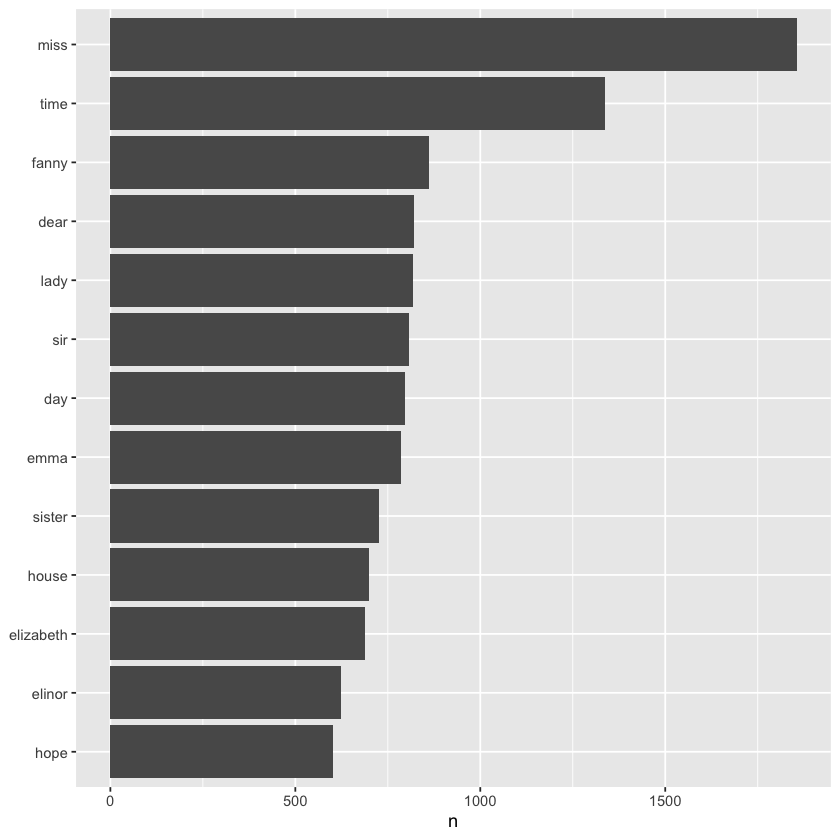

In [22]:
tidy_books %>%
  dplyr::count(word, sort = TRUE) %>%
  dplyr::filter(n > 600) %>%
  dplyr::mutate(word = stats::reorder(x = word, X = n)) %>%
  ggplot2::ggplot(ggplot2::aes(x = n, y = word)) +
    ggplot2::geom_col() +
    ggplot2::labs(y = NULL)

In [23]:
hgwells <- gutenbergr::gutenberg_download(c(35, 36, 5230, 159))

In [24]:
tidy_hgwells <-
  hgwells %>%
    tidytext::unnest_tokens(output = word, input = text) %>%
    dplyr::anti_join(y = stop_words, by = 'word')

head(tidy_hgwells)

gutenberg_id,word
<int>,<chr>
35,time
35,machine
35,invention
35,contents
35,introduction
35,ii


In [25]:
tidy_hgwells %>%
  dplyr::count(word, sort = TRUE) %>%
  head()

word,n
<chr>,<int>
time,461
people,302
door,260
heard,249
black,232
stood,229


In [26]:
bronte <- gutenbergr::gutenberg_download(c(1260, 768, 969, 9182, 767))

In [27]:
tidy_bronte <-
  bronte %>%
    tidytext::unnest_tokens(output = word, input = text) %>%
    dplyr::anti_join(y = tidytext::stop_words, by = 'word')

head(tidy_bronte)

gutenberg_id,word
<int>,<chr>
767,agnes
767,grey
767,acton
767,bell
767,london
767,thomas


In [28]:
tidy_bronte %>%
  dplyr::count(word, sort = TRUE) %>%
  head()

word,n
<chr>,<int>
time,1065
miss,854
day,825
don’t,780
hand,767
eyes,714


In [29]:
frequency <- dplyr::bind_rows(dplyr::mutate(tidy_bronte,  author = 'Brontë Sisters'),
                              dplyr::mutate(tidy_hgwells, author = 'H. G. Wells'),
                              dplyr::mutate(tidy_books,   author = 'Jane Austen')) %>%
  dplyr::mutate(word = stringr::str_extract(string = word, pattern = "[a-z']+")) %>%
  dplyr::count(author, word) %>%
  dplyr::group_by(author) %>%
  dplyr::mutate(proportion = n / base::sum(n)) %>%
  dplyr::select(-n) %>%
  tidyr::pivot_wider(names_from = author, values_from = proportion) %>%
  tidyr::pivot_longer(`Brontë Sisters`:`H. G. Wells`, names_to = 'author', values_to = 'proportion')

head(frequency)

word,Jane Austen,author,proportion
<chr>,<dbl>,<chr>,<dbl>
a,9.190796e-06,Brontë Sisters,6.645869e-05
a,9.190796e-06,H. G. Wells,1.471844e-05
aback,NA,Brontë Sisters,3.909335e-06
aback,NA,H. G. Wells,1.471844e-05
abaht,NA,Brontë Sisters,3.909335e-06
abaht,NA,H. G. Wells,NA


Warning message:
“Removed 40243 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 40245 rows containing missing values (`geom_text()`).”


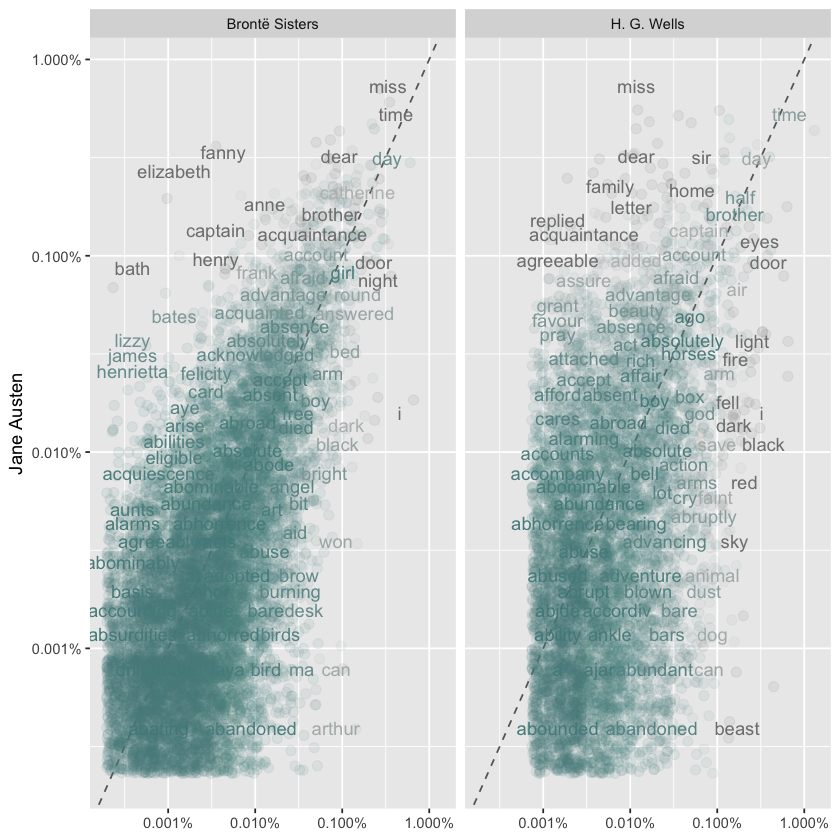

In [30]:
ggplot(frequency, aes(x = proportion, y = `Jane Austen`, color = abs(`Jane Austen` - proportion))) +
  geom_abline(color = 'gray40', lty = 2) +
  geom_jitter(alpha = 0.1, size = 2.5, width = 0.3, height = 0.3) +
  geom_text(aes(label = word), check_overlap = TRUE, vjust = 1.5) +
  scale_x_log10(labels = percent_format()) +
  scale_y_log10(labels = percent_format()) +
  scale_color_gradient(limits = c(0, 0.001), low = 'darkslategray4', high = 'gray75') +
  facet_wrap(~author, ncol = 2) +
  theme(legend.position = 'none') +
  labs(y = 'Jane Austen', x = NULL)

In [31]:
stats::cor.test(data = frequency[frequency$author == 'Brontë Sisters',], ~proportion + `Jane Austen`)


	Pearson's product-moment correlation

data:  proportion and Jane Austen
t = 110.73, df = 10275, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.7286645 0.7462983
sample estimates:
      cor 
0.7376071 


In [32]:
stats::cor.test(data = frequency[frequency$author == 'H. G. Wells',], ~proportion + `Jane Austen`)


	Pearson's product-moment correlation

data:  proportion and Jane Austen
t = 35.229, df = 6008, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.3925914 0.4345047
sample estimates:
      cor 
0.4137673 


---

## 2 - Sentiment analysis with tidy data

In [33]:
tidytext::get_sentiments('afinn') %>%
  utils::head()

word,value
<chr>,<dbl>
abandon,-2
abandoned,-2
abandons,-2
abducted,-2
abduction,-2
abductions,-2


In [34]:
tidytext::get_sentiments('bing') %>%
  utils::head()

word,sentiment
<chr>,<chr>
2-faces,negative
abnormal,negative
abolish,negative
abominable,negative
abominably,negative
abominate,negative


In [35]:
tidytext::get_sentiments('nrc') %>%
  utils::head()

word,sentiment
<chr>,<chr>
abacus,trust
abandon,fear
abandon,negative
abandon,sadness
abandoned,anger
abandoned,fear


In [36]:
tidy_books <-
  original_books %>%
    tidytext::unnest_tokens(output = word, input = text)

utils::head(tidy_books)

book,linenumber,chapter,word
<fct>,<int>,<int>,<chr>
Sense & Sensibility,1,0,sense
Sense & Sensibility,1,0,and
Sense & Sensibility,1,0,sensibility
Sense & Sensibility,3,0,by
Sense & Sensibility,3,0,jane
Sense & Sensibility,3,0,austen


In [37]:
nrc_joy <-
  tidytext::get_sentiments('nrc') %>%
    dplyr::filter(sentiment == 'joy')

utils::head(nrc_joy)

word,sentiment
<chr>,<chr>
absolution,joy
abundance,joy
abundant,joy
accolade,joy
accompaniment,joy
accomplish,joy


In [38]:
tidy_books %>%
  dplyr::filter(book == 'Emma') %>%
  dplyr::inner_join(y = nrc_joy, by = 'word') %>%
  dplyr::count(word, sort = TRUE) %>%
  utils::head()

word,n
<chr>,<int>
good,359
friend,166
hope,143
happy,125
love,117
deal,92


In [39]:
jane_austen_sentiment <-
  tidy_books %>%
    dplyr::inner_join(y = tidytext::get_sentiments('bing'), by = 'word') %>%
    dplyr::count(book, index = linenumber %/% 80, sentiment) %>%
    tidyr::pivot_wider(names_from = sentiment, values_from = n, values_fill = 0) %>%
    dplyr::mutate(sentiment = positive - negative)

utils::head(jane_austen_sentiment)

Warning message in dplyr::inner_join(., y = tidytext::get_sentiments("bing"), by = "word"):
“Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 435434 of `x` matches multiple rows in `y`.
ℹ Row 5051 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship =
  "many-to-many"` to silence this warning.”


book,index,negative,positive,sentiment
<fct>,<dbl>,<int>,<int>,<int>
Sense & Sensibility,0,16,32,16
Sense & Sensibility,1,19,53,34
Sense & Sensibility,2,12,31,19
Sense & Sensibility,3,15,31,16
Sense & Sensibility,4,16,34,18
Sense & Sensibility,5,16,51,35


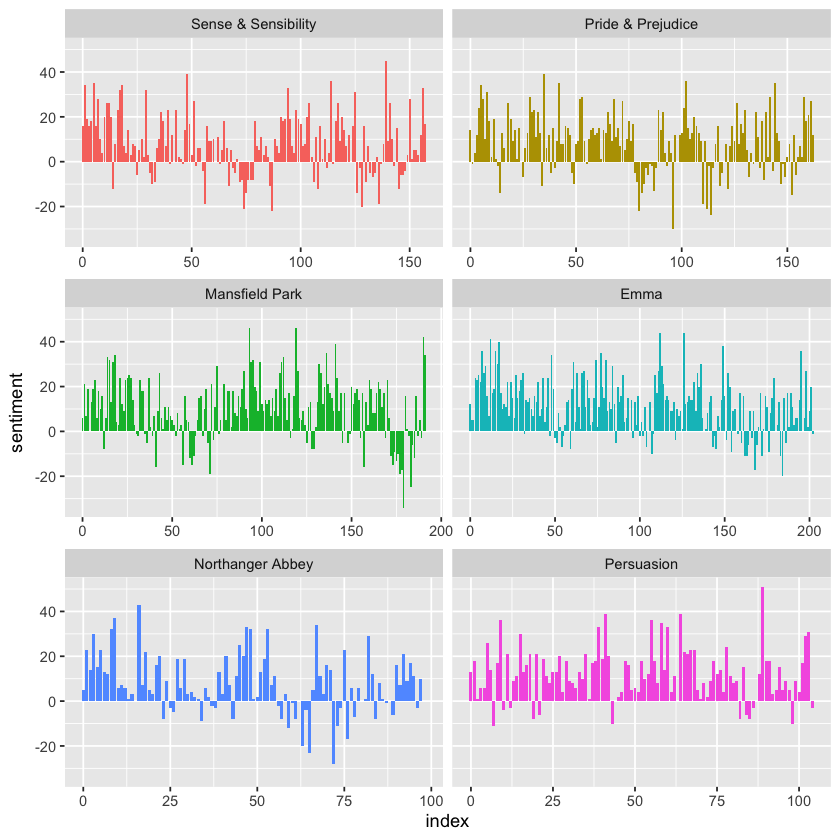

In [40]:
ggplot(jane_austen_sentiment, aes(index, sentiment, fill = book)) +
  geom_col(show.legend = FALSE) +
  facet_wrap(~book, ncol = 2, scales = 'free_x')

In [41]:
pride_prejudice <-
  tidy_books %>%
    dplyr::filter(book == 'Pride & Prejudice')

utils::head(pride_prejudice)

book,linenumber,chapter,word
<fct>,<int>,<int>,<chr>
Pride & Prejudice,1,0,pride
Pride & Prejudice,1,0,and
Pride & Prejudice,1,0,prejudice
Pride & Prejudice,3,0,by
Pride & Prejudice,3,0,jane
Pride & Prejudice,3,0,austen


In [42]:
afinn <-
  pride_prejudice %>%
    dplyr::inner_join(y = tidytext::get_sentiments('afinn'), by = 'word') %>%
    dplyr::group_by(index = linenumber %/% 80) %>%
    dplyr::summarize(sentiment = base::sum(value)) %>%
    dplyr::mutate(method = 'AFINN')

utils::head(afinn)

index,sentiment,method
<dbl>,<dbl>,<chr>
0,29,AFINN
1,0,AFINN
2,20,AFINN
3,30,AFINN
4,62,AFINN
5,66,AFINN


In [43]:
bing_and_nrc <-
  dplyr::bind_rows(
    pride_prejudice %>%
      dplyr::inner_join(y = tidytext::get_sentiments('bing'), by = 'word') %>%
      dplyr::mutate(method = 'Bing et al.'),
    pride_prejudice %>%
      dplyr::inner_join(y = tidytext::get_sentiments('nrc') %>%
                              dplyr::filter(sentiment %in% c('positive', 'negative')), by = 'word', relationship = 'many-to-many') %>%
      dplyr::mutate(method = 'NRC')
  ) %>%
  dplyr::count(method, index = linenumber %/% 80, sentiment) %>%
  tidyr::pivot_wider(names_from = sentiment, values_from = n, values_fill = 0) %>%
  dplyr::mutate(sentiment = positive - negative)

utils::head(bing_and_nrc)

method,index,negative,positive,sentiment
<chr>,<dbl>,<int>,<int>,<int>
Bing et al.,0,7,21,14
Bing et al.,1,20,19,-1
Bing et al.,2,16,20,4
Bing et al.,3,19,31,12
Bing et al.,4,23,47,24
Bing et al.,5,15,49,34


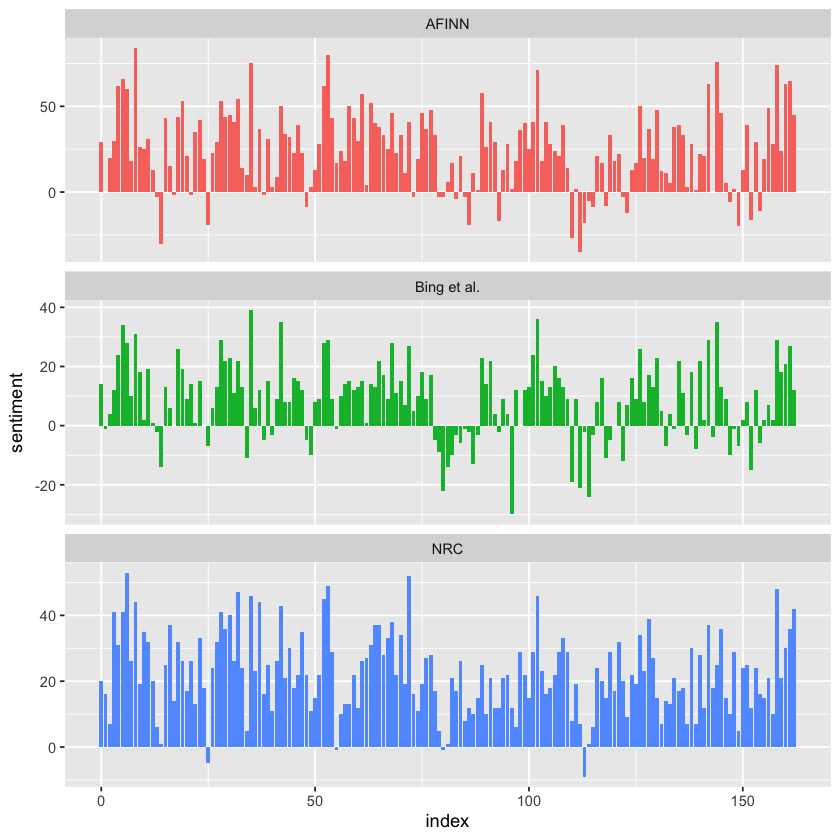

In [44]:
dplyr::bind_rows(afinn, bing_and_nrc) %>%
  ggplot(aes(index, sentiment, fill = method)) +
    geom_col(show.legend = FALSE) +
    facet_wrap(~method, ncol = 1, scales = 'free_y')

In [45]:
tidytext::get_sentiments('nrc') %>%
  dplyr::filter(sentiment %in% c('positive', 'negative')) %>%
  dplyr::count(sentiment)

sentiment,n
<chr>,<int>
negative,3316
positive,2308


In [46]:
tidytext::get_sentiments('bing') %>%
  dplyr::count(sentiment)

sentiment,n
<chr>,<int>
negative,4781
positive,2005


In [47]:
bing_word_counts <-
  tidy_books %>%
    dplyr::inner_join(tidytext::get_sentiments('bing'), by = 'word', relationship = 'many-to-many') %>%
    dplyr::count(word, sentiment, sort = TRUE) %>%
    dplyr::ungroup()

utils::head(bing_word_counts)

word,sentiment,n
<chr>,<chr>,<int>
miss,negative,1855
well,positive,1523
good,positive,1380
great,positive,981
like,positive,725
better,positive,639


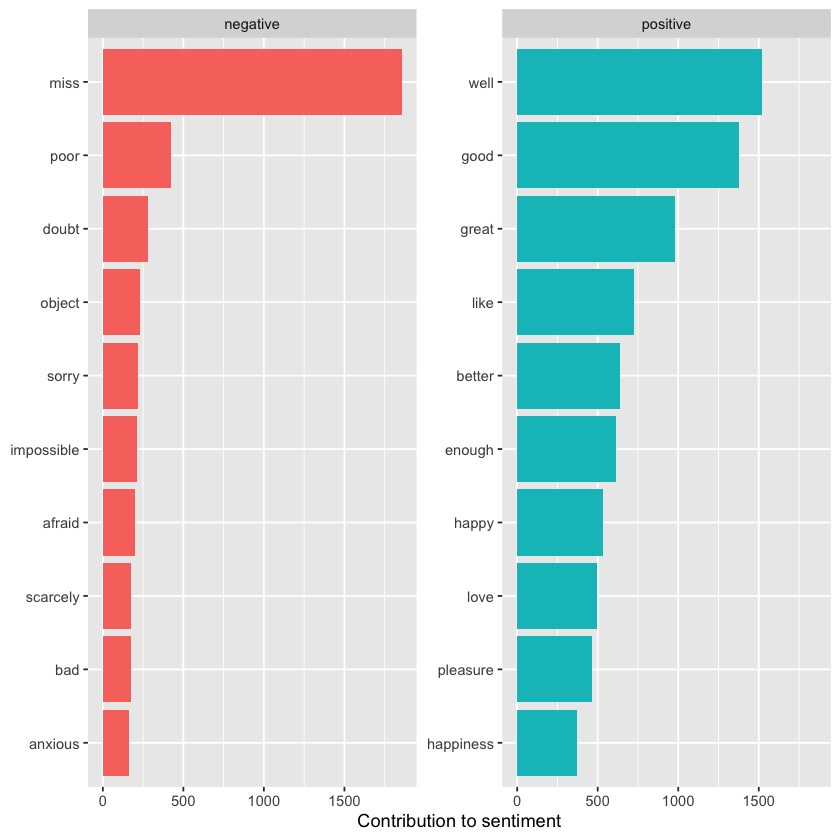

In [48]:
bing_word_counts %>%
  dplyr::group_by(sentiment) %>%
  dplyr::slice_max(n, n = 10) %>%
  dplyr::ungroup() %>%
  dplyr::mutate(word = stats::reorder(word, n)) %>%
  ggplot(aes(n, word, fill = sentiment)) +
    geom_col(show.legend = FALSE) +
    facet_wrap(~sentiment, scales = 'free_y') +
    labs(x = 'Contribution to sentiment', y = NULL)

In [49]:
custom_stop_words <-
  dplyr::bind_rows(tibble::tibble(word = c('miss'), lexicon = c('custom')), tidytext::stop_words)

head(custom_stop_words)

word,lexicon
<chr>,<chr>
miss,custom
a,SMART
a's,SMART
able,SMART
about,SMART
above,SMART


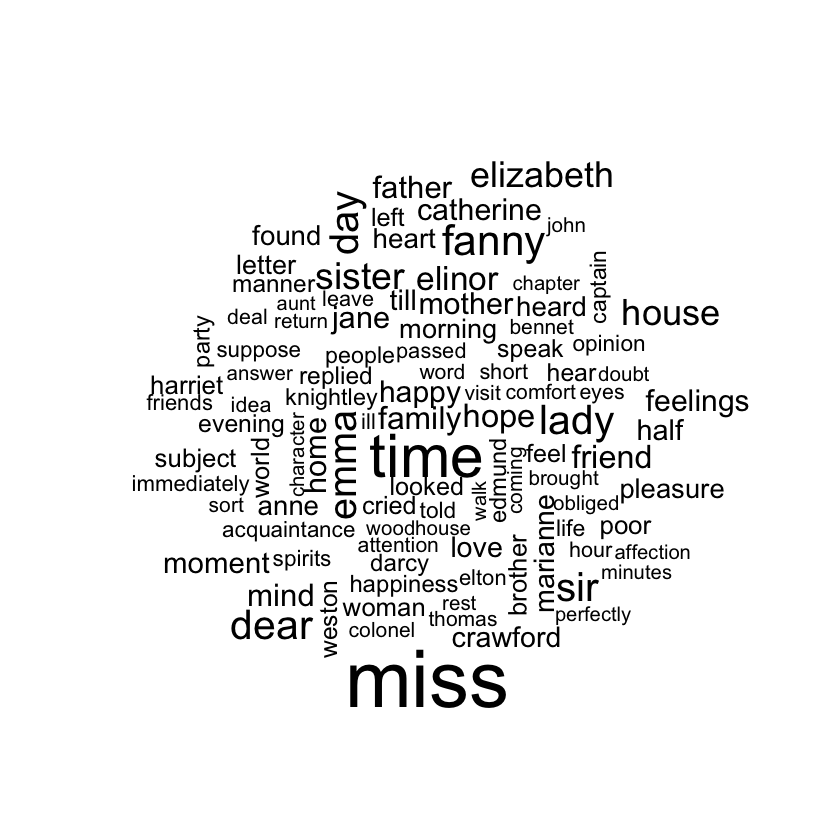

In [50]:
tidy_books %>%
  dplyr::anti_join(y = tidytext::stop_words, by = 'word') %>%
  dplyr::count(word) %>%
  base::with(wordcloud::wordcloud(words = word, freq = n, max.words = 100))

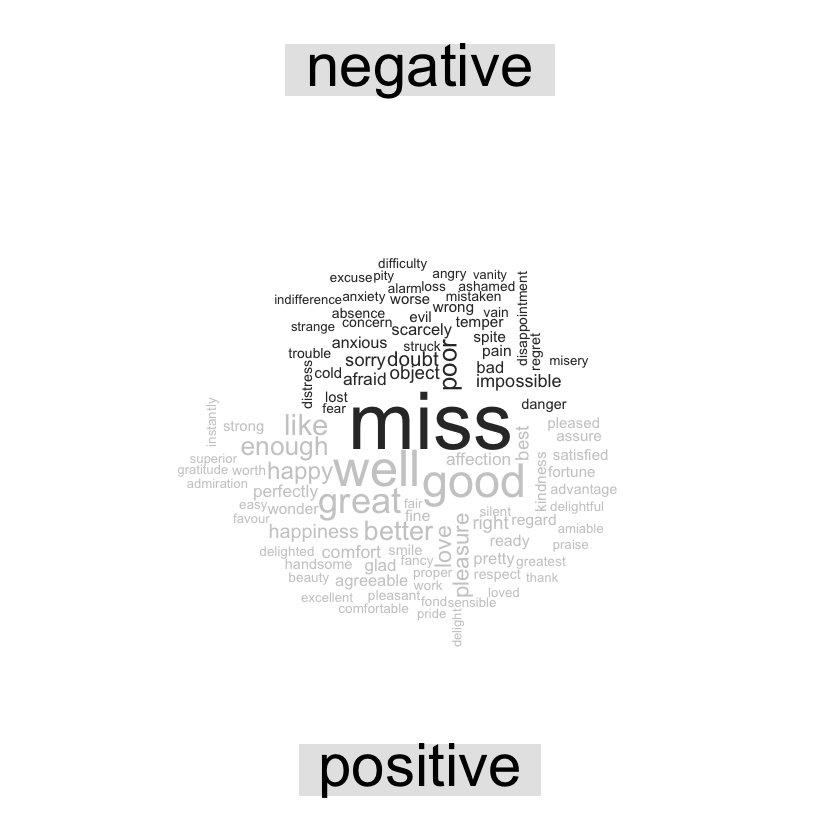

In [51]:
tidy_books %>%
  dplyr::inner_join(y = tidytext::get_sentiments('bing'), by = 'word', relationship = 'many-to-many') %>%
  dplyr::count(word, sentiment, sort = TRUE) %>%
  reshape2::acast(formula = word ~ sentiment, value.var = 'n', fill = 0) %>%
  wordcloud::comparison.cloud(colors = c('gray20', 'gray80'), max.words = 100)

In [52]:
p_and_p_sentences <-
  tibble::tibble(text = prideprejudice) %>%
    tidytext::unnest_tokens(sentence, text, token = 'sentences')

p_and_p_sentences$sentence[2]

[1] "by jane austen"

In [53]:
austen_chapters <-
  janeaustenr::austen_books() %>%
    dplyr::group_by(book) %>%
    tidytext::unnest_tokens(chapter, text, token = 'regex', pattern = 'Chapter|CHAPTER [\\dIVXLC]') %>%
    dplyr::ungroup()

austen_chapters %>%
  dplyr::group_by(book) %>%
  dplyr::summarize(chapters = n())

book,chapters
<fct>,<int>
Sense & Sensibility,51
Pride & Prejudice,62
Mansfield Park,49
Emma,56
Northanger Abbey,32
Persuasion,25


In [54]:
bingnegative <-
  tidytext::get_sentiments('bing') %>%
    dplyr::filter(sentiment == 'negative')

wordcounts <-
  tidy_books %>%
    dplyr::group_by(book, chapter) %>%
    dplyr::summarize(words = n())

tidy_books %>%
  dplyr::semi_join(y = bingnegative, by = 'word') %>%
  dplyr::group_by(book, chapter) %>%
  dplyr::summarize(negativewords = n()) %>%
  dplyr::left_join(y = wordcounts, by = c('book', 'chapter')) %>%
  dplyr::mutate(ratio = negativewords / words) %>%
  dplyr::filter(chapter != 0) %>%
  dplyr::slice_max(ratio, n = 1) %>%
  dplyr::ungroup()

`summarise()` has grouped output by 'book'. You can override using the
`.groups` argument.


`summarise()` has grouped output by 'book'. You can override using the
`.groups` argument.


book,chapter,negativewords,words,ratio
<fct>,<int>,<int>,<int>,<dbl>
Sense & Sensibility,43,161,3405,0.04728341
Pride & Prejudice,34,111,2104,0.05275665
Mansfield Park,46,173,3685,0.04694708
Emma,15,151,3340,0.04520958
Northanger Abbey,21,149,2982,0.04996647
Persuasion,4,62,1807,0.03431101


---

## 3 - Analyzing word and document frequency: tf-idf

In [55]:
book_words <-
  janeaustenr::austen_books() %>%
    tidytext::unnest_tokens(output = word, input = text) %>%
    dplyr::count(book, word, sort = TRUE)

utils::head(book_words)

book,word,n
<fct>,<chr>,<int>
Mansfield Park,the,6206
Mansfield Park,to,5475
Mansfield Park,and,5438
Emma,to,5239
Emma,the,5201
Emma,and,4896


In [56]:
total_words <-
  book_words %>%
    dplyr::group_by(book) %>%
    dplyr::summarize(total = base::sum(n))

total_words

book,total
<fct>,<int>
Sense & Sensibility,119957
Pride & Prejudice,122204
Mansfield Park,160460
Emma,160996
Northanger Abbey,77780
Persuasion,83658


In [57]:
book_words <-
  dplyr::left_join(x = book_words, y = total_words)

utils::head(book_words)

Joining with `by = join_by(book)`


book,word,n,total
<fct>,<chr>,<int>,<int>
Mansfield Park,the,6206,160460
Mansfield Park,to,5475,160460
Mansfield Park,and,5438,160460
Emma,to,5239,160996
Emma,the,5201,160996
Emma,and,4896,160996


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


Warning message:
“Removed 896 rows containing non-finite values (`stat_bin()`).”
Warning message:
“Removed 6 rows containing missing values (`geom_bar()`).”


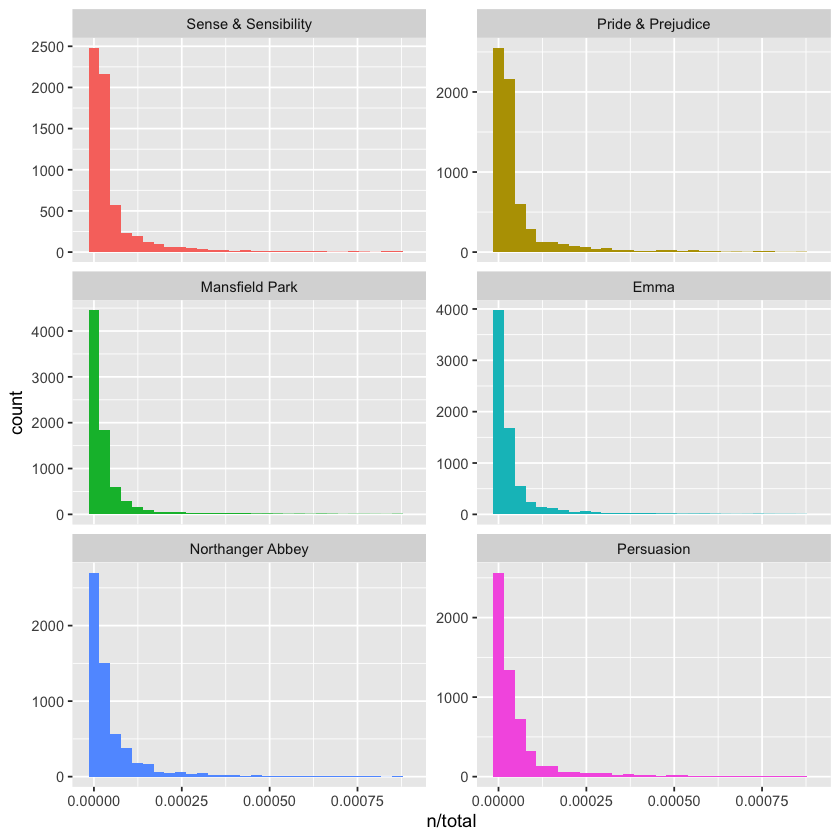

In [58]:
# TERM FREQUENCY

book_words %>%
  ggplot(aes(n / total, fill = book)) +
    geom_histogram(show.legend = FALSE) +
    xlim(NA, 0.0009) +
    facet_wrap(~book, ncol = 2, scales = 'free_y')

In [59]:
freq_by_rank <-
  book_words %>%
    dplyr::group_by(book) %>%
    dplyr::mutate(rank = dplyr::row_number(), `term frequency` = n / total) %>%
    dplyr::ungroup()

utils::head(freq_by_rank)

book,word,n,total,rank,term frequency
<fct>,<chr>,<int>,<int>,<int>,<dbl>
Mansfield Park,the,6206,160460,1,0.03867631
Mansfield Park,to,5475,160460,2,0.03412065
Mansfield Park,and,5438,160460,3,0.03389007
Emma,to,5239,160996,1,0.03254118
Emma,the,5201,160996,2,0.03230515
Emma,and,4896,160996,3,0.03041069


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


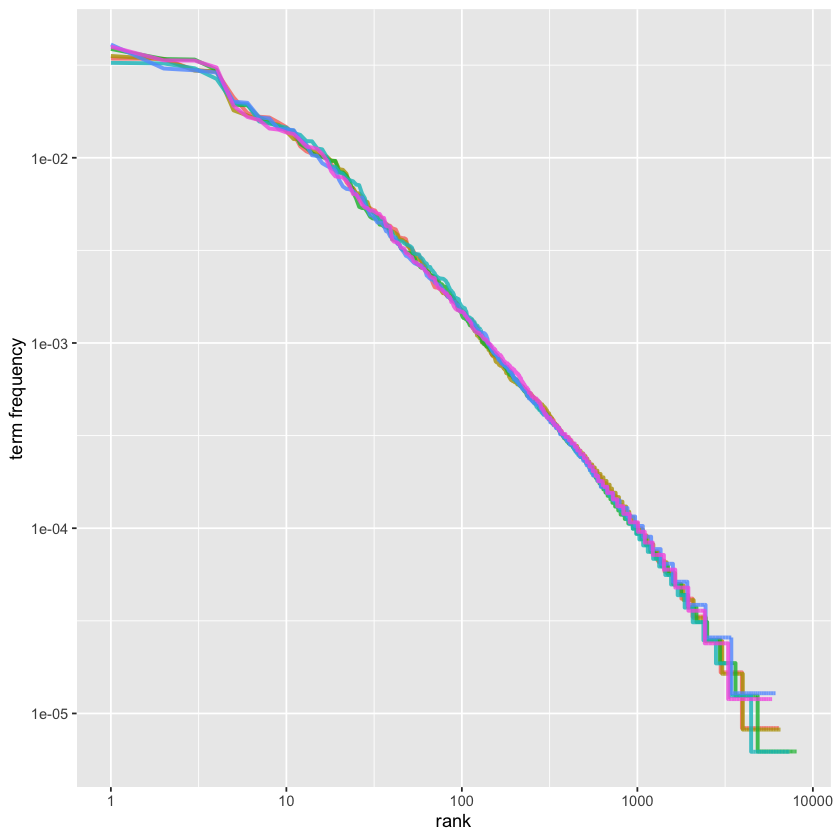

In [60]:
freq_by_rank %>%
  ggplot(aes(rank, `term frequency`, color = book)) +
  geom_line(size = 1.1, alpha = 0.8, show.legend = FALSE) +
  scale_x_log10() +
  scale_y_log10()

In [61]:
rank_subset <-
  freq_by_rank %>%
    dplyr::filter(rank < 500, rank > 10)

utils::head(rank_subset)

book,word,n,total,rank,term frequency
<fct>,<chr>,<int>,<int>,<int>,<dbl>
Mansfield Park,she,2246,160460,11,0.01399726
Emma,in,2189,160996,11,0.01359661
Emma,not,2140,160996,12,0.01329226
Emma,you,1980,160996,13,0.01229844
Emma,be,1975,160996,14,0.01226739
Mansfield Park,be,1904,160460,12,0.01186589


In [62]:
stats::lm(base::log10(`term frequency`) ~ base::log10(rank), data = rank_subset)


Call:
stats::lm(formula = base::log10(`term frequency`) ~ base::log10(rank), 
    data = rank_subset)

Coefficients:
      (Intercept)  base::log10(rank)  
          -0.6226            -1.1125  


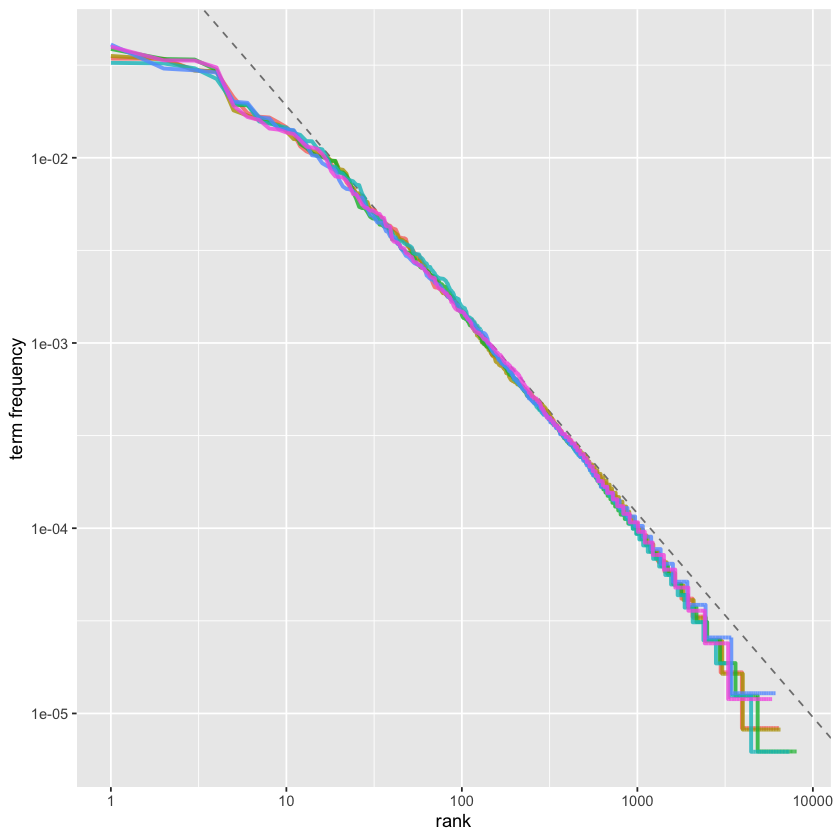

In [63]:
freq_by_rank %>%
  ggplot(aes(rank, `term frequency`, color = book)) +
  geom_abline(intercept = -0.62, slope = -1.1, color = 'gray50', linetype = 2) +
  geom_line(size = 1.1, alpha = 0.8, show.legend = FALSE) +
  scale_x_log10() +
  scale_y_log10()

In [64]:
# intput to the function `tidytext::bind_tf_idf()`
#
# case: token-document
# variables:
#   word - tokens
#   book - documents
#      n - tokens per document counts

head(book_words)

book,word,n,total
<fct>,<chr>,<int>,<int>
Mansfield Park,the,6206,160460
Mansfield Park,to,5475,160460
Mansfield Park,and,5438,160460
Emma,to,5239,160996
Emma,the,5201,160996
Emma,and,4896,160996


In [65]:
book_tf_idf <-
  book_words %>%
  tidytext::bind_tf_idf(term = word, document = book, n = n)

head(book_tf_idf)

book,word,n,total,tf,idf,tf_idf
<fct>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>
Mansfield Park,the,6206,160460,0.03867631,0,0
Mansfield Park,to,5475,160460,0.03412065,0,0
Mansfield Park,and,5438,160460,0.03389007,0,0
Emma,to,5239,160996,0.03254118,0,0
Emma,the,5201,160996,0.03230515,0,0
Emma,and,4896,160996,0.03041069,0,0


In [66]:
book_tf_idf %>%
  dplyr::select(-total) %>%
  dplyr::arrange(dplyr::desc(tf_idf)) %>%
  head()

book,word,n,tf,idf,tf_idf
<fct>,<chr>,<int>,<dbl>,<dbl>,<dbl>
Sense & Sensibility,elinor,623,0.005193528,1.791759,0.009305552
Sense & Sensibility,marianne,492,0.004101470,1.791759,0.007348847
Mansfield Park,crawford,493,0.003072417,1.791759,0.005505032
Pride & Prejudice,darcy,373,0.003052273,1.791759,0.005468939
Persuasion,elliot,254,0.003036171,1.791759,0.005440088
Emma,emma,786,0.004882109,1.098612,0.005363545


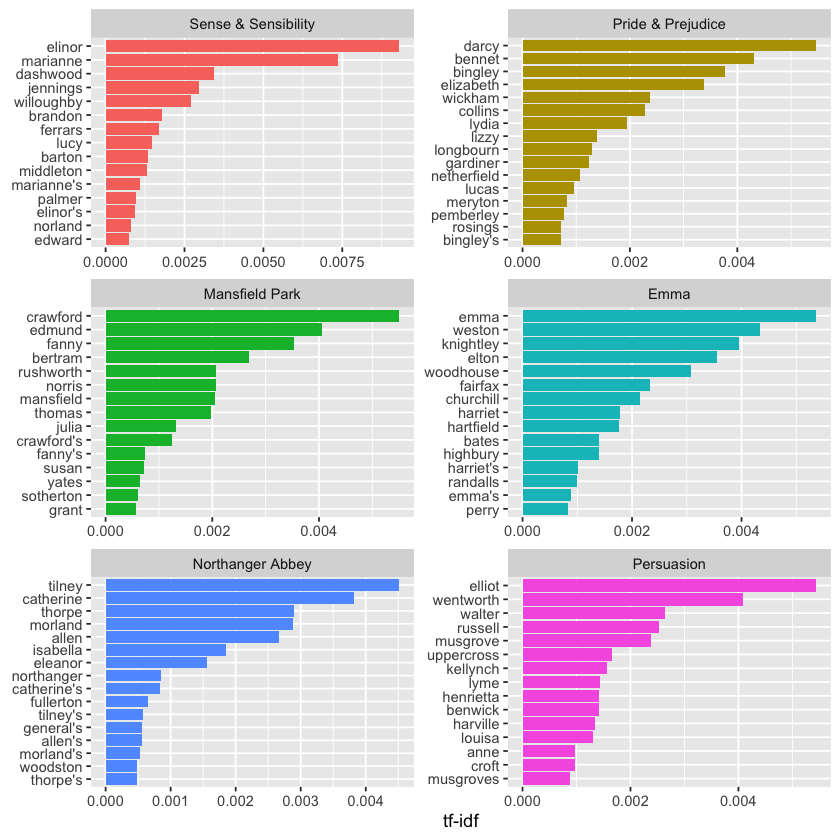

In [67]:
book_tf_idf %>%
  dplyr::group_by(book) %>%
  dplyr::slice_max(order_by = tf_idf, n = 15) %>%
  dplyr::ungroup() %>%
  ggplot(aes(tf_idf, forcats::fct_reorder(.f = word, .x = tf_idf), fill = book)) +
  geom_col(show.legend = FALSE) +
  facet_wrap(~book, ncol = 2, scales = 'free') +
  labs(x = 'tf-idf', y = NULL)

In [68]:
physics <-
  gutenbergr::gutenberg_download(c(37729, 14725, 13476, 30155), meta_fields = 'author')

head(physics)

gutenberg_id,text,author
<int>,<chr>,<chr>
13476,EXPERIMENTS WITH ALTERNATE CURRENTS OF HIGH POTENTIAL AND HIGH FREQUENCY,"Tesla, Nikola"
13476,,"Tesla, Nikola"
13476,"A Lecture Delivered before the Institution of Electrical Engineers, London","Tesla, Nikola"
13476,,"Tesla, Nikola"
13476,by,"Tesla, Nikola"
13476,,"Tesla, Nikola"


In [69]:
physics_words <-
  physics %>%
  tidytext::unnest_tokens(output = word, input = text) %>%
  dplyr::count(author, word, sort = TRUE)

head(physics_words)

author,word,n
<chr>,<chr>,<int>
"Galilei, Galileo",the,3760
"Tesla, Nikola",the,3604
"Huygens, Christiaan",the,3553
"Einstein, Albert",the,2993
"Galilei, Galileo",of,2049
"Einstein, Albert",of,2029


In [70]:
plot_physics <-
  physics_words %>%
  tidytext::bind_tf_idf(term = word, document = author, n = n) %>%
  dplyr::mutate(author = base::factor(author, levels = c('Galilei, Galileo', 'Huygens, Christiaan', 'Tesla, Nikola', 'Einstein, Albert')))

head(plot_physics)

author,word,n,tf,idf,tf_idf
<fct>,<chr>,<int>,<dbl>,<dbl>,<dbl>
"Galilei, Galileo",the,3760,0.09354165,0,0
"Tesla, Nikola",the,3604,0.09125206,0,0
"Huygens, Christiaan",the,3553,0.09280155,0,0
"Einstein, Albert",the,2993,0.09516391,0,0
"Galilei, Galileo",of,2049,0.05097522,0,0
"Einstein, Albert",of,2029,0.06451305,0,0


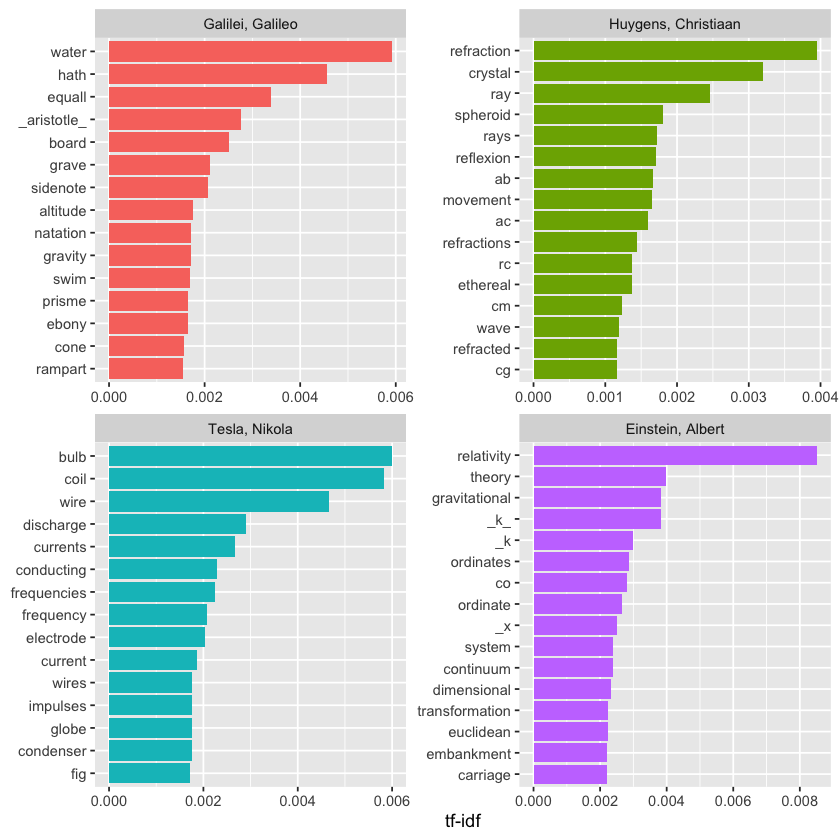

In [71]:
plot_physics %>%
  dplyr::group_by(author) %>%
  dplyr::slice_max(order_by = tf_idf, n = 15) %>%
  dplyr::ungroup() %>%
  dplyr::mutate(word = stats::reorder(x = word, X = tf_idf)) %>%
  ggplot(aes(tf_idf, word, fill = author)) +
  geom_col(show.legend = FALSE) +
  labs(x = 'tf-idf', y = NULL) +
  facet_wrap(~author, ncol = 2, scales = 'free')

In [72]:
physics %>%
  dplyr::filter(stringr::str_detect(text, '_k_')) %>%
  dplyr::select(text)

text
<chr>
surface AB at the points AK_k_B. Then instead of the hemispherical
would needs be that from all the other points K_k_B there should
"necessarily be equal to CD, because C_k_ is equal to CK, and C_g_ to"
"the crystal at K_k_, all the points of the wave CO_oc_ will have"
"O_o_ has reached K_k_. Which is easy to comprehend, since, of these"
"CO_oc_ in the crystal, when O_o_ has arrived at K_k_, because it forms"
ρ is the average density of the matter and _k_ is a constant connected


In [73]:
physics %>%
  dplyr::filter(stringr::str_detect(text, 'RC')) %>%
  dplyr::select(text) %>%
  head()

text
<chr>
"line RC, parallel and equal to AB, to be a portion of a wave of light,"
"represents the partial wave coming from the point A, after the wave RC"
"be the propagation of the wave RC which fell on AB, and would be the"
"transparent body; seeing that the wave RC, having come to the aperture"
incident rays. Let there be such a ray RC falling upon the surface
"CK. Make CO perpendicular to RC, and across the angle KCO adjust OK,"


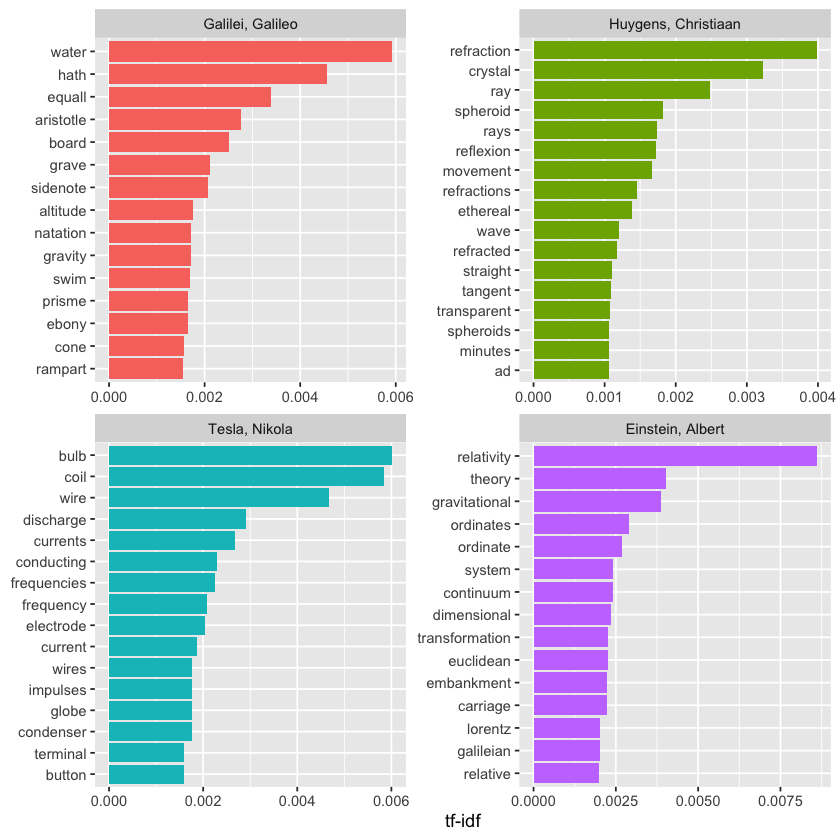

In [74]:
mystopwords <-
  tibble::tibble(word = c('eq', 'co', 'rc', 'ac', 'ak', 'bn', 'fig', 'file', 'cg', 'cb', 'cm', 'ab', '_k', '_k_', '_x'))

physics_words <-
  dplyr::anti_join(x = physics_words, y = mystopwords, by = 'word')

plot_physics <-
  physics_words %>%
  tidytext::bind_tf_idf(term = word, document = author, n = n) %>%
  dplyr::mutate(word = stringr::str_remove_all(word, '_')) %>%
  dplyr::group_by(author) %>%
  dplyr::slice_max(order_by = tf_idf, n = 15) %>%
  dplyr::ungroup() %>%
  dplyr::mutate(word = forcats::fct_reorder(.f = word, .x = tf_idf)) %>%
  dplyr::mutate(author = base::factor(author, levels = c('Galilei, Galileo', 'Huygens, Christiaan', 'Tesla, Nikola', 'Einstein, Albert')))

plot_physics %>%
  ggplot(aes(tf_idf, word, fill = author)) +
  geom_col(show.legend = FALSE) +
  facet_wrap(~author, ncol = 2, scales = 'free') +
  labs(x = 'tf-idf', y = NULL)

---

## 4 - Relationships between words: n-grams and correlations

In [75]:
# TIDY
#
#     case: one token per row (where a token is a bigram)
# metadata: variable `book`

austen_bigrams <-
  janeaustenr::austen_books() %>%
  tidytext::unnest_tokens(output = bigram, input = text, token = 'ngrams', n = 2) %>%
  dplyr::filter(!is.na(bigram))

head(austen_bigrams)

book,bigram
<fct>,<chr>
Sense & Sensibility,sense and
Sense & Sensibility,and sensibility
Sense & Sensibility,by jane
Sense & Sensibility,jane austen
Sense & Sensibility,chapter 1
Sense & Sensibility,the family


In [76]:
# the most common bigrams

austen_bigrams %>%
  dplyr::count(bigram, sort = TRUE) %>%
  head()

bigram,n
<chr>,<int>
of the,2853
to be,2670
in the,2221
it was,1691
i am,1485
she had,1405


In [77]:
# remove stop words

bigrams_separated <-
  austen_bigrams %>%
  tidyr::separate(col = bigram, into = c('word1', 'word2'), sep = ' ')

bigrams_filtered <-
  bigrams_separated %>%
  dplyr::filter(!word1 %in% tidytext::stop_words$word) %>%
  dplyr::filter(!word2 %in% tidytext::stop_words$word)

bigram_counts <-
  bigrams_filtered %>%
  dplyr::count(word1, word2, sort = TRUE)

head(bigram_counts)

word1,word2,n
<chr>,<chr>,<int>
sir,thomas,266
miss,crawford,196
captain,wentworth,143
miss,woodhouse,143
frank,churchill,114
lady,russell,110


In [78]:
bigrams_united <-
  bigrams_filtered %>%
  tidyr::unite(col = bigram, word1, word2, sep = ' ')

head(bigrams_united)

book,bigram
<fct>,<chr>
Sense & Sensibility,jane austen
Sense & Sensibility,chapter 1
Sense & Sensibility,norland park
Sense & Sensibility,surrounding acquaintance
Sense & Sensibility,late owner
Sense & Sensibility,advanced age


In [79]:
janeaustenr::austen_books() %>%
  tidytext::unnest_tokens(output = trigram, input = text, token = 'ngrams', n = 3) %>%
  dplyr::filter(!is.na(trigram)) %>%
  tidyr::separate(col = trigram, into = c('word1', 'word2', 'word3'), sep = ' ') %>%
  dplyr::filter(!word1 %in% stop_words$word,
                !word2 %in% stop_words$word,
                !word3 %in% stop_words$word) %>%
  dplyr::count(word1, word2, word3, sort = TRUE) %>%
  head()

word1,word2,word3,n
<chr>,<chr>,<chr>,<int>
dear,miss,woodhouse,20
miss,de,bourgh,17
lady,catherine,de,11
poor,miss,taylor,11
sir,walter,elliot,10
catherine,de,bourgh,9


In [80]:
bigrams_filtered %>%
  dplyr::filter(word2 == 'street') %>%
  dplyr::count(book, word1, sort = TRUE) %>%
  head()

book,word1,n
<fct>,<chr>,<int>
Sense & Sensibility,harley,16
Sense & Sensibility,berkeley,15
Northanger Abbey,milsom,10
Northanger Abbey,pulteney,10
Mansfield Park,wimpole,9
Pride & Prejudice,gracechurch,8


In [81]:
bigram_tf_idf <-
  bigrams_united %>%
  dplyr::count(book, bigram) %>%
  tidytext::bind_tf_idf(term = bigram, document = book, n = n) %>%
  dplyr::arrange(desc(tf_idf))

head(bigram_tf_idf)

book,bigram,n,tf,idf,tf_idf
<fct>,<chr>,<int>,<dbl>,<dbl>,<dbl>
Mansfield Park,sir thomas,266,0.03043478,1.791759,0.05453181
Persuasion,captain wentworth,143,0.02896496,1.791759,0.05189824
Mansfield Park,miss crawford,196,0.02242563,1.791759,0.04018133
Persuasion,lady russell,110,0.02228074,1.791759,0.03992172
Persuasion,sir walter,108,0.02187563,1.791759,0.03919587
Emma,miss woodhouse,143,0.01726219,1.791759,0.03092970


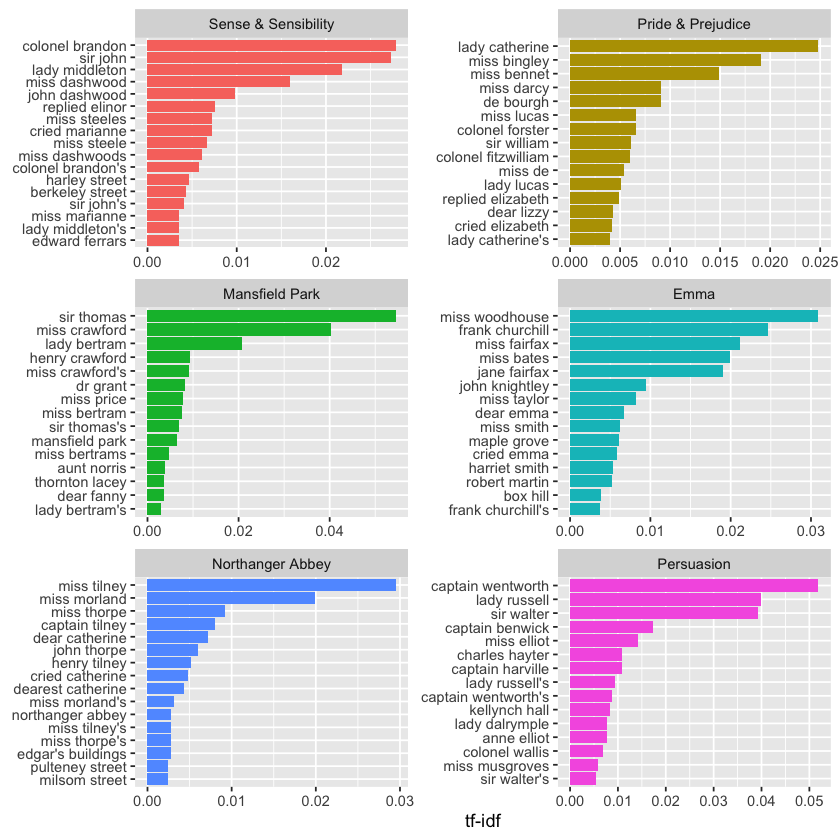

In [82]:
bigram_tf_idf %>%
  dplyr::group_by(book) %>%
  dplyr::slice_max(order_by = tf_idf, n = 15) %>%
  dplyr::ungroup() %>%
  ggplot(aes(tf_idf, forcats::fct_reorder(.f = bigram, .x = tf_idf), fill = book)) +
  geom_col(show.legend = FALSE) +
  facet_wrap(~book, ncol = 2, scales = 'free') +
  labs(x = 'tf-idf', y = NULL)

In [83]:
bigrams_separated %>%
  dplyr::filter(word1 == 'not') %>%
  dplyr::count(word1, word2, sort = TRUE) %>%
  head()

word1,word2,n
<chr>,<chr>,<int>
not,be,580
not,to,335
not,have,307
not,know,237
not,a,184
not,think,162


In [84]:
AFINN <- tidytext::get_sentiments('afinn')
head(AFINN)

word,value
<chr>,<dbl>
abandon,-2
abandoned,-2
abandons,-2
abducted,-2
abduction,-2
abductions,-2


In [86]:
not_words <-
  bigrams_separated %>%
  dplyr::filter(word1 == 'not') %>%
  dplyr::inner_join(y = AFINN, by = c(word2 = 'word')) %>%
  dplyr::count(word2, value, sort = TRUE)

head(not_words)

word2,value,n
<chr>,<dbl>,<int>
like,2,95
help,2,77
want,1,41
wish,1,39
allow,1,30
care,2,21


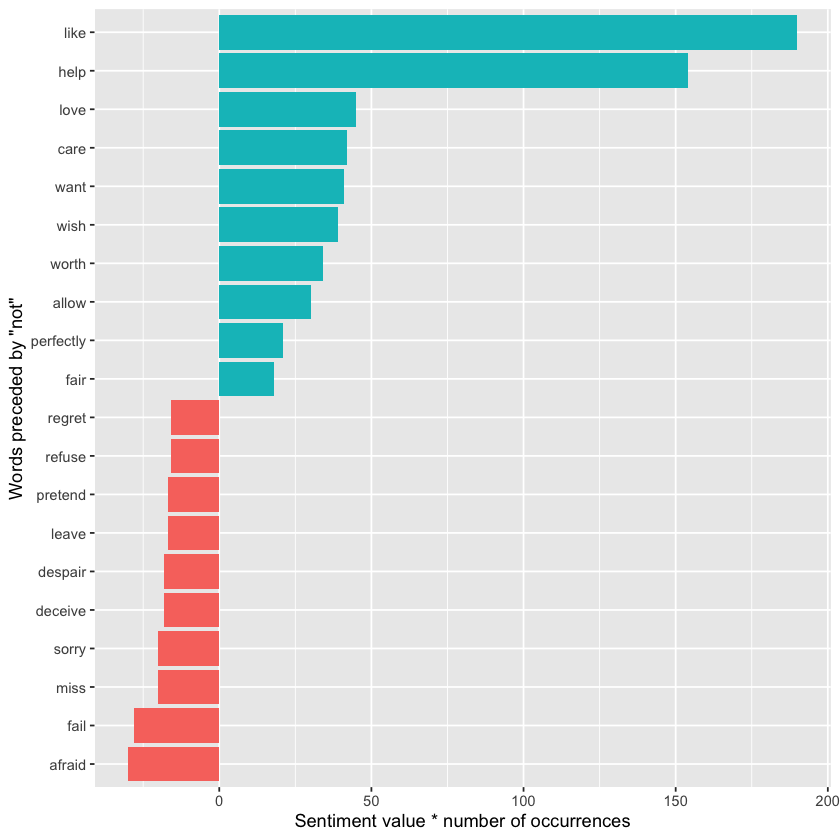

In [88]:
not_words %>%
  dplyr::mutate(contribution = n * value) %>%
  dplyr::arrange(dplyr::desc(base::abs(contribution))) %>%
  utils::head(20) %>%
  dplyr::mutate(word2 = stats::reorder(x = word2, X = contribution)) %>%
  ggplot(aes(n * value, word2, fill = n * value > 0)) +
  geom_col(show.legend = FALSE) +
  labs(x = 'Sentiment value * number of occurrences', y = 'Words preceded by \"not\"')

In [90]:
negation_words <- c('not', 'no', 'never', 'without')

negated_words <-
  bigrams_separated %>%
  dplyr::filter(word1 %in% negation_words) %>%
  dplyr::inner_join(y = AFINN, by = c(word2 = 'word')) %>%
  dplyr::count(word1, word2, value, sort = TRUE)

head(negated_words)

word1,word2,value,n
<chr>,<chr>,<dbl>,<int>
no,doubt,-1,96
not,like,2,95
not,help,2,77
no,no,-1,58
not,want,1,41
not,wish,1,39


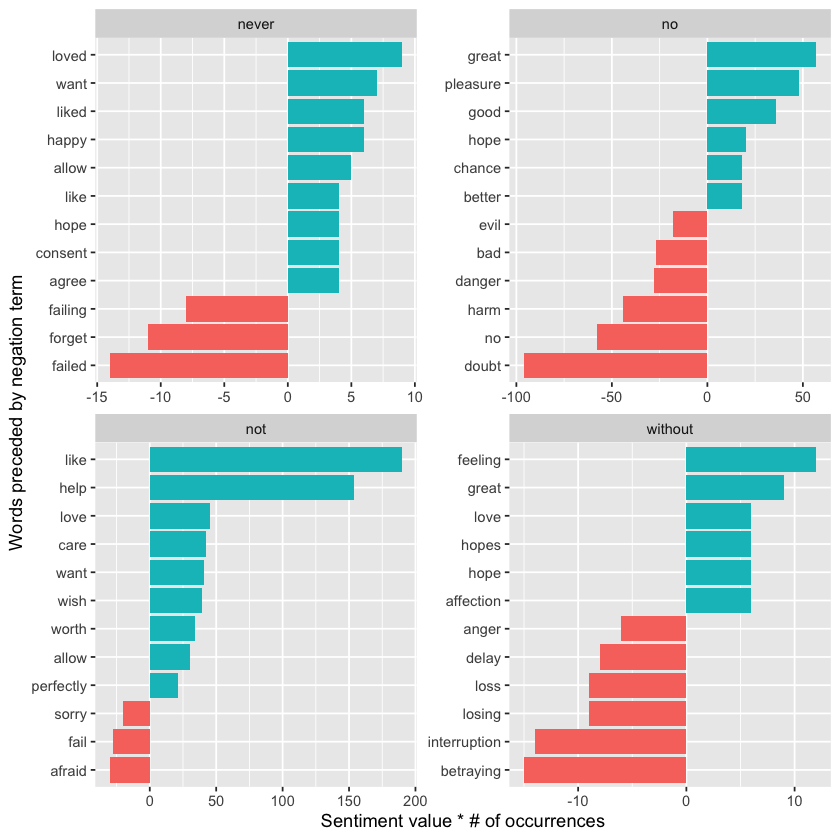

In [92]:
negated_words %>%
  dplyr::mutate(contribution = n * value, word2 = stats::reorder(x = base::paste(word2, word1, sep = "__"), X = contribution)) %>%
  dplyr::group_by(word1) %>%
  dplyr::slice_max(abs(contribution), n = 12, with_ties = FALSE) %>%
  ggplot(aes(word2, contribution, fill = n * value > 0)) +
  geom_col(show.legend = FALSE) +
  facet_wrap(~ word1, scales = "free") +
  scale_x_discrete(labels = function(x) gsub("__.+$", "", x)) +
  xlab("Words preceded by negation term") +
  ylab("Sentiment value * # of occurrences") +
  coord_flip()

In [97]:
bigram_graph <-
  bigram_counts %>%
  dplyr::filter(n > 20) %>%
  igraph::graph_from_data_frame()

head(bigram_graph)

  [[ suppressing 85 column names ‘sir’, ‘miss’, ‘captain’ ... ]]



6 x 85 sparse Matrix of class "dgCMatrix"
                                                                               
sir     . . . . . . . . . . 1 . . . . . . . . . . . . . . . 1 . . . . . 1 . . .
miss    . . . . . . . . . . . . . . . . . . . . . . . . . . . 1 . 1 . . . 1 1 .
captain . . . . . . . . . . . . . . . . . . . . . . . . . . . . 1 . . . . . . .
frank   . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 1 . . . . .
lady    . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 1 . 1 . .
colonel . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 1
                                                                               
sir     . . . . . . . . . . . . . . . . . 1 1 . . . . . . . . . . . . . . . . .
miss    1 . . 1 1 . 1 1 1 . 1 . 1 . 1 1 1 . . . . . 1 . . . . . . . . . . 1 . .
captain . . . . . . . . . 1 . . . . . . . . . . . . . . . 1 . . . . . . . . 1 .
frank   . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

Warning message:
“Using the `size` aesthetic in this geom was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` in the `default_aes` field and elsewhere instead.”


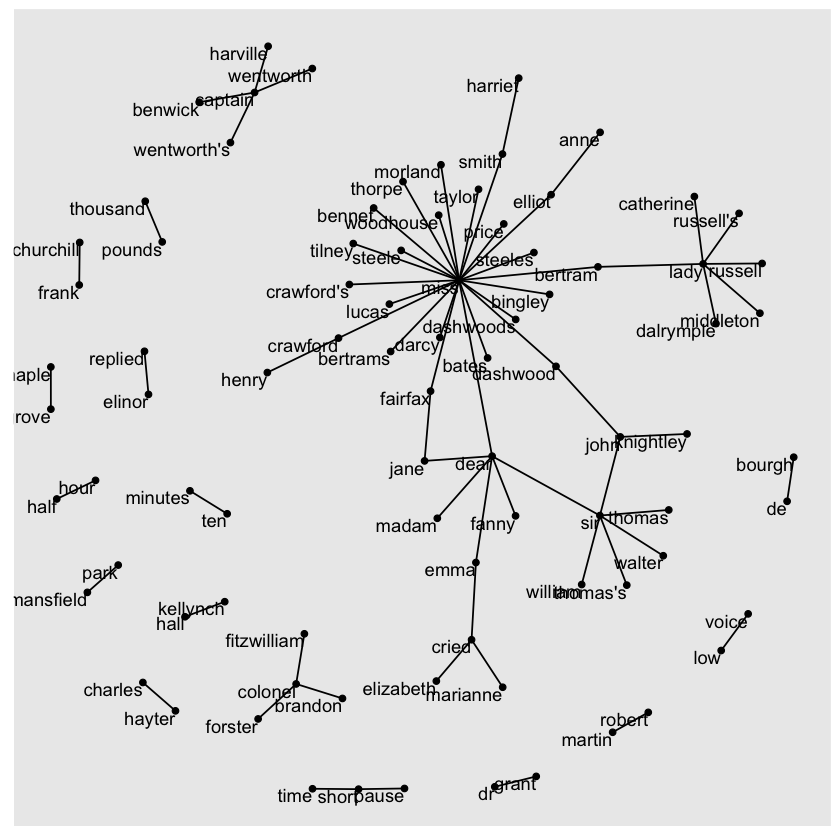

In [98]:
set.seed(2017)

ggraph(bigram_graph, layout = 'fr') +
  geom_edge_link() +
  geom_node_point() +
  geom_node_text(aes(label = name), vjust = 1, hjust = 1)

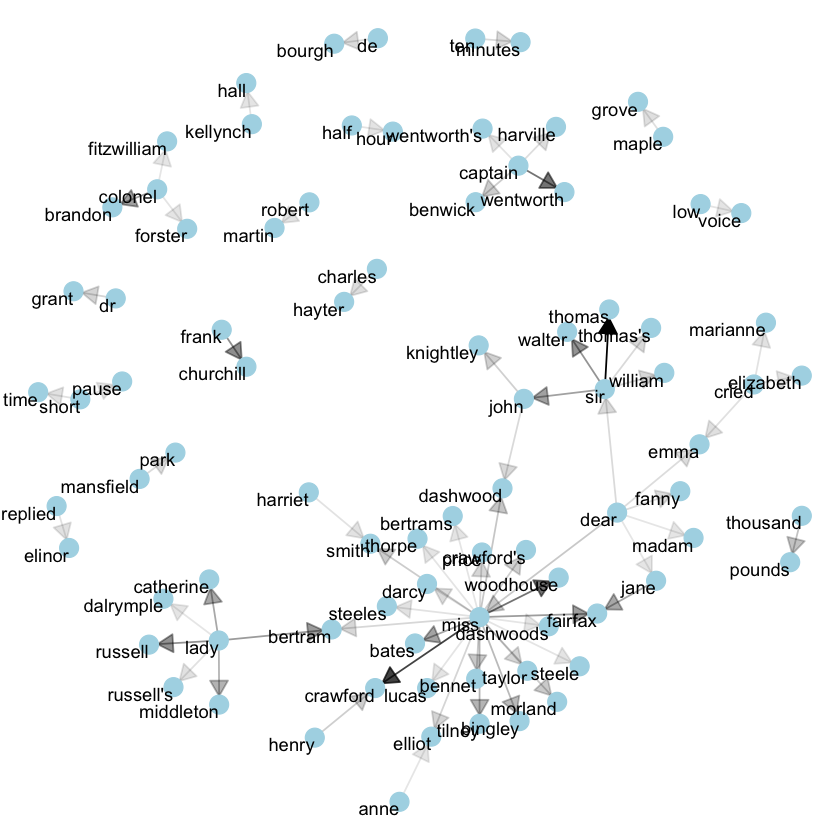

In [101]:
set.seed(2020)

a <- grid::arrow(type = 'closed', length = ggplot2::unit(.15, 'inches'))

ggraph(bigram_graph, layout = 'fr') +
  geom_edge_link(aes(edge_alpha = n), show.legend = FALSE, arrow = a, end_cap = ggraph::circle(.07, 'inches')) +
  geom_node_point(color = 'lightblue', size = 5) +
  geom_node_text(aes(label = name), vjust = 1, hjust = 1) +
  theme_void()

In [105]:
count_bigrams <- function (dataset) {
  dataset %>%
    tidytext::unnest_tokens(output = bigram, input = text, token = 'ngrams', n = 2) %>%
    tidyr::separate(col = bigram, into = c('word1', 'word2'), sep = ' ') %>%
    dplyr::filter(!word1 %in% tidytext::stop_words$word,
                  !word2 %in% tidytext::stop_words$word) %>%
    dplyr::count(word1, word2, sort = TRUE)
}

visualize_bigrams <- function (bigrams) {
  set.seed(2016)

  a <- grid::arrow(type = 'closed', length = ggplot2::unit(.15, 'inches'))

  bigrams %>%
    ggraph(layout = 'fr') +
    geom_edge_link(aes(edge_alpha = n), show.legend = FALSE, arrow = a) +
    geom_node_point(color = 'lightblue', size = 5) +
    geom_node_text(aes(label = name), vjust = 1, hjust = 1) +
    theme_void()
}

In [106]:
kjv <- gutenberg_download(10)

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'father’s' in 'mbcsToSbcs': dot substituted for <e2>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'father’s' in 'mbcsToSbcs': dot substituted for <80>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'father’s' in 'mbcsToSbcs': dot substituted for <99>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'king’s' in 'mbcsToSbcs': dot substituted for <e2>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'king’s' in 'mbcsToSbcs': dot substituted for <80>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'king’s' in 'mbcsToSbcs': dot substituted for <99>”


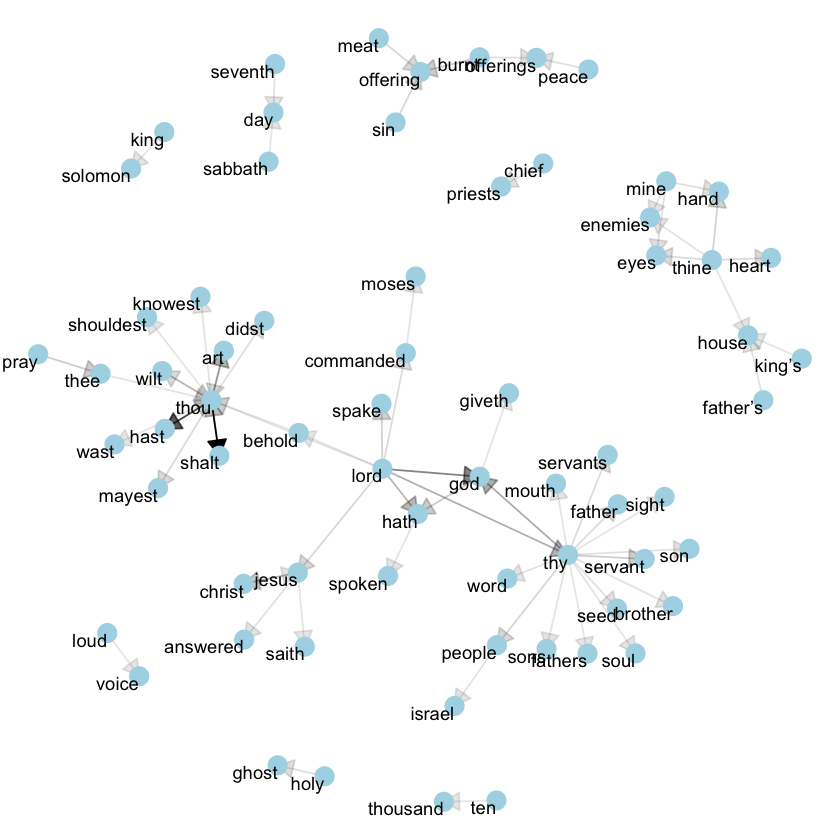

In [107]:
kjv_bigrams <-
  kjv %>%
  count_bigrams()

kjv_bigrams %>%
  dplyr::filter(n > 40, !stringr::str_detect(word1, '\\d'), !stringr::str_detect(word2, '\\d')) %>%
  visualize_bigrams()

In [108]:
austen_section_words <-
  janeaustenr::austen_books() %>%
  dplyr::filter(book == 'Pride & Prejudice') %>%
  dplyr::mutate(section = dplyr::row_number() %/% 10) %>%
  dplyr::filter(section > 0) %>%
  tidytext::unnest_tokens(output = word, input = text) %>%
  dplyr::filter(!word %in% tidytext::stop_words$word)

head(austen_section_words)

book,section,word
<fct>,<dbl>,<chr>
Pride & Prejudice,1,truth
Pride & Prejudice,1,universally
Pride & Prejudice,1,acknowledged
Pride & Prejudice,1,single
Pride & Prejudice,1,possession
Pride & Prejudice,1,fortune


In [110]:
# count words cooccurring within sections
word_pairs <-
  austen_section_words %>%
  widyr::pairwise_count(item = word, feature = section, sort = TRUE)

head(word_pairs)

item1,item2,n
<chr>,<chr>,<dbl>
darcy,elizabeth,144
elizabeth,darcy,144
miss,elizabeth,110
elizabeth,miss,110
elizabeth,jane,106
jane,elizabeth,106


In [111]:
word_pairs %>%
  dplyr::filter(item1 == 'darcy') %>%
  head()

item1,item2,n
<chr>,<chr>,<dbl>
darcy,elizabeth,144
darcy,miss,92
darcy,bingley,86
darcy,jane,46
darcy,bennet,45
darcy,sister,45


In [112]:
word_cors <-
  austen_section_words %>%
  dplyr::group_by(word) %>%
  dplyr::filter(n() >= 20) %>%
  widyr::pairwise_cor(item = word, feature = section, sort = TRUE)

head(word_cors)

item1,item2,correlation
<chr>,<chr>,<dbl>
bourgh,de,0.9508501
de,bourgh,0.9508501
pounds,thousand,0.7005808
thousand,pounds,0.7005808
william,sir,0.6644719
sir,william,0.6644719


In [114]:
word_cors %>%
  dplyr::filter(item1 == 'pounds') %>%
  head()

item1,item2,correlation
<chr>,<chr>,<dbl>
pounds,thousand,0.7005808
pounds,ten,0.2305758
pounds,fortune,0.1638626
pounds,settled,0.1494605
pounds,wickham's,0.1415240
pounds,children,0.1290001


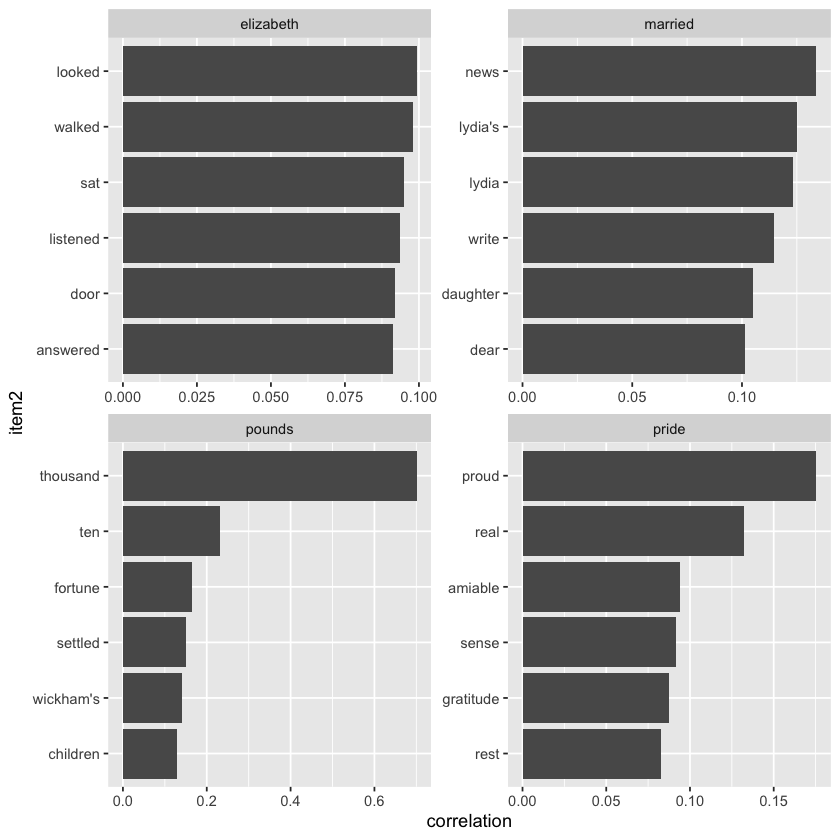

In [117]:
word_cors %>%
  dplyr::filter(item1 %in% c('elizabeth', 'pounds', 'married', 'pride')) %>%
  dplyr::group_by(item1) %>%
  dplyr::slice_max(correlation, n = 6) %>%
  dplyr::ungroup() %>%
  dplyr::mutate(item2 = stats::reorder(x = item2, X = correlation)) %>%
  ggplot(aes(item2, correlation)) +
  geom_bar(stat = 'identity') +
  facet_wrap(~item1, scales = 'free') +
  coord_flip()

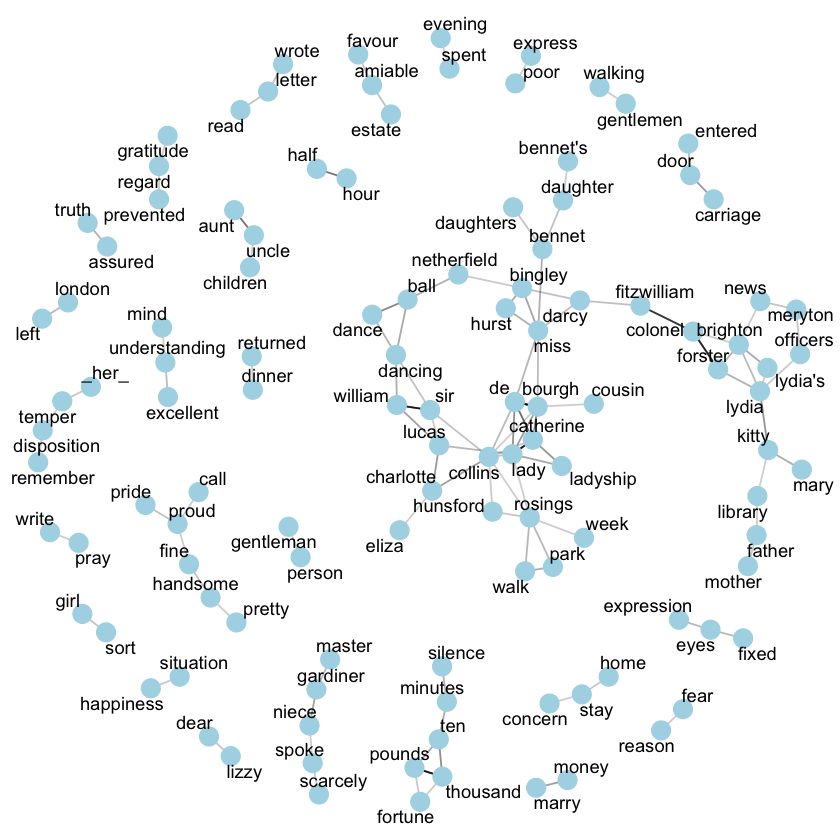

In [121]:
# pairs of words in Pride & Prejudice that show at least a .15 correlation of appearing within the same 10-line section

set.seed(2016)

word_cors %>%
  dplyr::filter(correlation > .15) %>%
  igraph::graph_from_data_frame() %>%
  ggraph(layout = 'fr') +
  geom_edge_link(aes(edge_alpha = correlation), show.legend = FALSE) +
  geom_node_point(color = 'lightblue', size = 5) +
  geom_node_text(aes(label = name), repel = TRUE) +
  theme_void()

---

* `tidytext::unnest_tokens` tokenize by word, by sentence, by sequences of words `token = 'ngrams', n = 2`
* `tidytext::bind_tf_idf(term = word, document = author, n = n)`

Relationships
* word-document (tf-idf and frequency analysis)
* word-sentiment (sentiment analysis)
* word-word (n-gram)

How to quantify what a document is about? look at the words that make up a document

How important is a word?
* term frequency (TF)
  * how frequently a word occurs in a document
* inverse document frequency (IDF)
  * decreases the weight for commonly used words and increases the weight for words that are not used very much in a collection of documents
* TF-IDF
  * the product of TF and IDF: the frequency of a term adjusted for how rarely it is used
  * measures how important a word is to a document in a collection of documents

$
\begin{aligned}
\text{idf}(\text{term})
=\ln \left( \frac{n_\text{documents}}{n_\text{documents containing term}} \right)
\end{aligned}
$

Zipf's Empirical Law: the frequency that a word appears is inversely proportional to its rank.

$
\begin{aligned}
\text{frequency} \propto \frac{1}{\text{rank}}
\end{aligned}
$

* [[W](https://en.wikipedia.org/wiki/Clause)] Clause
* [[W](https://en.wikipedia.org/wiki/Topic_and_comment)] Comment (Rheme)
* [[W](https://en.wikipedia.org/wiki/Text_corpus)] Corpus
* [[W](https://en.wikipedia.org/wiki/Document)] Document
* [[W](https://en.wikipedia.org/wiki/Document_classification)] Document Classification
* [[W](https://en.wikipedia.org/wiki/Document_clustering)] Document Clustering
* [[W](https://en.wikipedia.org/wiki/English_articles)] English article
* [[W](https://en.wikipedia.org/wiki/Lexicon)] Lexicon
* [[W](https://en.wikipedia.org/wiki/Named_entity)] Named Entity
* [[W](https://en.wikipedia.org/wiki/Named-entity_recognition)] Named-Entity Recognition
* [[W](https://en.wikipedia.org/wiki/Natural_language)] Natural Language
* [[W](https://en.wikipedia.org/wiki/Rank%E2%80%93size_distribution)] Rank-Size Distribution
* [[W](https://en.wikipedia.org/wiki/Sentiment_analysis)] Sentiment Analysis
* [[W](https://en.wikipedia.org/wiki/Stop_word)] Stop Word
* [[W](https://en.wikipedia.org/wiki/Text_mining)] Text Mining
* [[W](https://en.wikipedia.org/wiki/Automatic_summarization)] Text Summarization
* [[W](https://en.wikipedia.org/wiki/Topic_and_comment)] Topic (Theme)
* [[W](https://en.wikipedia.org/wiki/Topic-prominent_language)] Topic-Prominent Language
* [[W](https://en.wikipedia.org/wiki/Tf%E2%80%93idf)] TF-IDF
* [[W](https://en.wikipedia.org/wiki/Word_count)] Word Count
* [[W](https://en.wikipedia.org/wiki/Word_list)] Word List
* [[W](https://en.wikipedia.org/wiki/Zipf%27s_law)] Zipf's Law

* [[W](https://en.wikipedia.org/wiki/Karen_Sp%C3%A4rck_Jones)] Jones, Karen (1935-2007)
* [[W](https://en.wikipedia.org/wiki/Hans_Peter_Luhn)] Luhn, Hans (1896-1964)
* [[W](https://en.wikipedia.org/wiki/George_Kingsley_Zipf)] Zipf, George (1902-1950)